#掛接雲端

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#爬取ptt文章

In [ ]:
# 導入 模組(module) 
import requests 
# 導入 BeautifulSoup 模組(module)：解析HTML 語法工具
import bs4

# 文章連結
URL = "https://www.ptt.cc/bbs/Gossiping/M.1658591135.A.326.html"
# 設定Header與Cookie
my_headers = {'cookie': 'over18=1;'}
# 發送get 請求 到 ptt 八卦版
response = requests.get(URL, headers = my_headers)


#  把網頁程式碼(HTML) 丟入 bs4模組分析
soup = bs4.BeautifulSoup(response.text,"html.parser")

## PTT 上方4個欄位
header = soup.find_all('span','article-meta-value')

# 作者
author = header[0].text
# 看版
board = header[1].text
# 標題
title = header[2].text
# 日期
date = header[3].text


## 查找所有html 元素 抓出內容
main_container = soup.find(id='main-container')
# 把所有文字都抓出來
all_text = main_container.text
# 把整個內容切割透過 "-- " 切割成2個陣列
pre_text = all_text.split('--')[0]
    
# 把每段文字 根據 '\n' 切開
texts = pre_text.split('\n')
# 如果你爬多篇你會發現 
contents = texts[2:]
# 內容
content = '\n'.join(contents)


# 顯示
print('作者：'+author)
print('看板：'+board)
print('標題：'+title)
print('日期：'+date)
print('內容：'+content)

#獲取txt檔

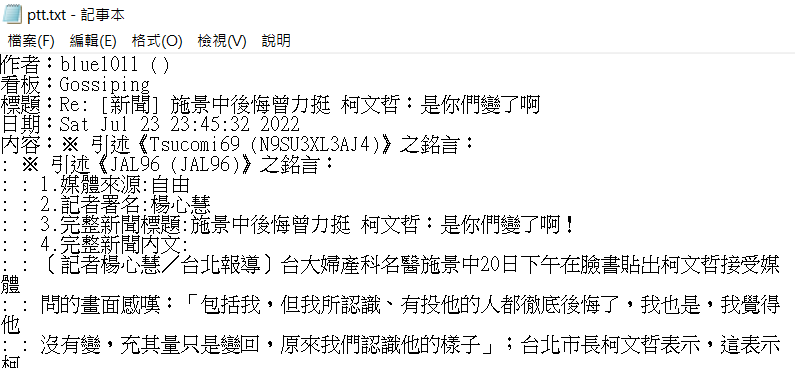

#文字雲

Building prefix dict from /content/drive/MyDrive/Colab Notebooks/東海課程(全)/5. 文字探勘/dict.txt.big.txt ...
2022-07-23 17:47:49,130 DEBUG: Building prefix dict from /content/drive/MyDrive/Colab Notebooks/東海課程(全)/5. 文字探勘/dict.txt.big.txt ...
Loading model from cache /tmp/jieba.uae88aaf72fde4158a2d34f4ac5173a8f.cache
2022-07-23 17:47:49,138 DEBUG: Loading model from cache /tmp/jieba.uae88aaf72fde4158a2d34f4ac5173a8f.cache
Loading model cost 1.114 seconds.
2022-07-23 17:47:50,246 DEBUG: Loading model cost 1.114 seconds.
Prefix dict has been built successfully.
2022-07-23 17:47:50,256 DEBUG: Prefix dict has been built successfully.


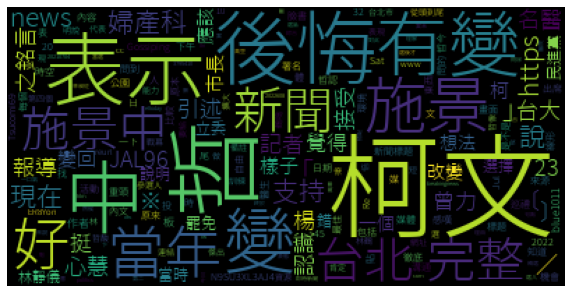

In [75]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
from collections import Counter
from PIL import Image
import numpy as np
import requests
text = open('ptt.txt', "r",encoding="utf-8").read()
jieba.set_dictionary('dict.txt.big.txt')
with open('stopWord_cloud.txt', 'r', encoding='utf-8-sig') as f:
#with open('stopWord_cloudmod.txt', 'r', encoding='utf-8-sig') as f:
    stops = f.read().split('\n')   
terms = []
for t in jieba.cut(text, cut_all=False):
    if t not in stops:
        terms.append(t)
diction = Counter(terms)

# 下載台北思源黑體
fontfile = requests.get("https://drive.google.com/uc?id=1QdaqR8Setf4HEulrIW79UEV_Lg_fuoWz&export=download")

with open('taipei_sans_tc_beta.ttf', 'wb') as f:
  f.write(fontfile.content)
wordcloud = WordCloud(font_path='taipei_sans_tc_beta.ttf') 
#mask = np.array(Image.open("heart.png")) 
#wordcloud = WordCloud(background_color="white",mask=mask,font_path='taipei_sans_tc_beta.ttf') 
wordcloud.generate_from_frequencies(frequencies=diction)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file("bookCloud.png")